In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('train_spam.csv')

# EDA

In [3]:
df

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


<Axes: >

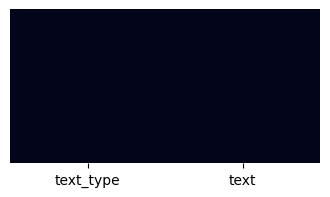

In [4]:
plt.figure(figsize=(4, 2))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

# PIPELINE


   <img src="https://habrastorage.org/r/w1560/getpro/habr/upload_files/1af/e66/5f0/1afe665f038a06b3cf7eaef4e3c8e928.png">


# 1) LowCase, Tokenize, Stop-words, Lem

### - 1) LowerCase 

In [5]:
df['text'] = df['text'].str.lower()

In [6]:
df

,text_type,text
0,ham,make sure alex knows his birthday is over in f...
1,ham,a resume for john lavorato thanks vince i will...
2,spam,plzz visit my website moviesgodml to get all m...
3,spam,urgent your mobile number has been awarded wit...
4,ham,overview of hr associates analyst project per ...
...,...,...
16273,spam,if you are interested in binary options tradin...
16274,spam,dirty pictureblyk on aircel thanks you for bei...
16275,ham,or you could do this g on mon 1635465 sep 1635...
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...


### - 2) Tokenize

In [7]:
import nltk

nltk.download('punkt')

def tokenize(text):
    """Tokenizes a string of text and returns a list of tokens.

    Args:
        text (str): The text to tokenize.

    Returns:
        tokens (list): A list of tokens.
    """
    tokens = nltk.word_tokenize(text)
    return [w for w in tokens if w.isalpha()]

# Assuming df is your dataframe and it has a 'text' column
df['text_tokenize'] = df['text'].apply(tokenize)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
df

,text_type,text,text_tokenize
0,ham,make sure alex knows his birthday is over in f...,"[make, sure, alex, knows, his, birthday, is, o..."
1,ham,a resume for john lavorato thanks vince i will...,"[a, resume, for, john, lavorato, thanks, vince..."
2,spam,plzz visit my website moviesgodml to get all m...,"[plzz, visit, my, website, moviesgodml, to, ge..."
3,spam,urgent your mobile number has been awarded wit...,"[urgent, your, mobile, number, has, been, awar..."
4,ham,overview of hr associates analyst project per ...,"[overview, of, hr, associates, analyst, projec..."
...,...,...,...
16273,spam,if you are interested in binary options tradin...,"[if, you, are, interested, in, binary, options..."
16274,spam,dirty pictureblyk on aircel thanks you for bei...,"[dirty, pictureblyk, on, aircel, thanks, you, ..."
16275,ham,or you could do this g on mon 1635465 sep 1635...,"[or, you, could, do, this, g, on, mon, sep, da..."
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...,"[insta, reels, par, bhara, pada, hai, kuch, bh..."


### - 3) Stop-words


In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['text_no_stop_words'] = df['text_tokenize'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df

,text_type,text,text_tokenize,text_no_stop_words
0,ham,make sure alex knows his birthday is over in f...,"[make, sure, alex, knows, his, birthday, is, o...","[make, sure, alex, knows, birthday, fifteen, m..."
1,ham,a resume for john lavorato thanks vince i will...,"[a, resume, for, john, lavorato, thanks, vince...","[resume, john, lavorato, thanks, vince, get, m..."
2,spam,plzz visit my website moviesgodml to get all m...,"[plzz, visit, my, website, moviesgodml, to, ge...","[plzz, visit, website, moviesgodml, get, movie..."
3,spam,urgent your mobile number has been awarded wit...,"[urgent, your, mobile, number, has, been, awar...","[urgent, mobile, number, awarded, prize, guara..."
4,ham,overview of hr associates analyst project per ...,"[overview, of, hr, associates, analyst, projec...","[overview, hr, associates, analyst, project, p..."
...,...,...,...,...
16273,spam,if you are interested in binary options tradin...,"[if, you, are, interested, in, binary, options...","[interested, binary, options, trading, may, co..."
16274,spam,dirty pictureblyk on aircel thanks you for bei...,"[dirty, pictureblyk, on, aircel, thanks, you, ...","[dirty, pictureblyk, aircel, thanks, valued, m..."
16275,ham,or you could do this g on mon 1635465 sep 1635...,"[or, you, could, do, this, g, on, mon, sep, da...","[could, g, mon, sep, david, rees, wrote, mon, ..."
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...,"[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reels, par, bhara, pada, hai, kuch, bh..."


### - 4) Lem



In [11]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

nltk.download('wordnet')

def lemmatize_word(word):
    """Lemmatize a word using WordNetLemmatizer.

    Args:
        word (str): The word to lemmatize.

    Returns:
        str: The lemmatized word.
    """
    lemmatizer = WordNetLemmatizer()
    pos_tag = get_wordnet_pos(word)
    lemma = lemmatizer.lemmatize(word, pos=pos_tag)
    return lemma

def get_wordnet_pos(word):
    """Map POS tag to WordNet POS tag.

    Args:
        word (str): The word to get the POS tag for.

    Returns:
        str: The WordNet POS tag.
    """
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

df['text_lemmatized'] = df['text_no_stop_words'].apply(lambda x: [lemmatize_word(word) for word in x])

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ataka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df

,text_type,text,text_tokenize,text_no_stop_words,text_lemmatized
0,ham,make sure alex knows his birthday is over in f...,"[make, sure, alex, knows, his, birthday, is, o...","[make, sure, alex, knows, birthday, fifteen, m...","[make, sure, alex, know, birthday, fifteen, mi..."
1,ham,a resume for john lavorato thanks vince i will...,"[a, resume, for, john, lavorato, thanks, vince...","[resume, john, lavorato, thanks, vince, get, m...","[resume, john, lavorato, thanks, vince, get, m..."
2,spam,plzz visit my website moviesgodml to get all m...,"[plzz, visit, my, website, moviesgodml, to, ge...","[plzz, visit, website, moviesgodml, get, movie...","[plzz, visit, website, moviesgodml, get, movie..."
3,spam,urgent your mobile number has been awarded wit...,"[urgent, your, mobile, number, has, been, awar...","[urgent, mobile, number, awarded, prize, guara...","[urgent, mobile, number, award, prize, guarant..."
4,ham,overview of hr associates analyst project per ...,"[overview, of, hr, associates, analyst, projec...","[overview, hr, associates, analyst, project, p...","[overview, hr, associate, analyst, project, pe..."
...,...,...,...,...,...
16273,spam,if you are interested in binary options tradin...,"[if, you, are, interested, in, binary, options...","[interested, binary, options, trading, may, co...","[interested, binary, option, trading, may, con..."
16274,spam,dirty pictureblyk on aircel thanks you for bei...,"[dirty, pictureblyk, on, aircel, thanks, you, ...","[dirty, pictureblyk, aircel, thanks, valued, m...","[dirty, pictureblyk, aircel, thanks, value, me..."
16275,ham,or you could do this g on mon 1635465 sep 1635...,"[or, you, could, do, this, g, on, mon, sep, da...","[could, g, mon, sep, david, rees, wrote, mon, ...","[could, g, mon, sep, david, rees, write, mon, ..."
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...,"[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reel, par, bhara, pada, hai, kuch, bhi..."


# Эмбединги

### 1) TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

df['text_tfidf'] = df['text_lemmatized'].apply(lambda x: ' '.join(x))

tf_idf_emb = vectorizer.fit_transform(df['text_tfidf'])
df['text_tfidf'] = tf_idf_emb.toarray()

In [14]:
df

,text_type,text,text_tokenize,text_no_stop_words,text_lemmatized,text_tfidf
0,ham,make sure alex knows his birthday is over in f...,"[make, sure, alex, knows, his, birthday, is, o...","[make, sure, alex, knows, birthday, fifteen, m...","[make, sure, alex, know, birthday, fifteen, mi...",0.0
1,ham,a resume for john lavorato thanks vince i will...,"[a, resume, for, john, lavorato, thanks, vince...","[resume, john, lavorato, thanks, vince, get, m...","[resume, john, lavorato, thanks, vince, get, m...",0.0
2,spam,plzz visit my website moviesgodml to get all m...,"[plzz, visit, my, website, moviesgodml, to, ge...","[plzz, visit, website, moviesgodml, get, movie...","[plzz, visit, website, moviesgodml, get, movie...",0.0
3,spam,urgent your mobile number has been awarded wit...,"[urgent, your, mobile, number, has, been, awar...","[urgent, mobile, number, awarded, prize, guara...","[urgent, mobile, number, award, prize, guarant...",0.0
4,ham,overview of hr associates analyst project per ...,"[overview, of, hr, associates, analyst, projec...","[overview, hr, associates, analyst, project, p...","[overview, hr, associate, analyst, project, pe...",0.0
...,...,...,...,...,...,...
16273,spam,if you are interested in binary options tradin...,"[if, you, are, interested, in, binary, options...","[interested, binary, options, trading, may, co...","[interested, binary, option, trading, may, con...",0.0
16274,spam,dirty pictureblyk on aircel thanks you for bei...,"[dirty, pictureblyk, on, aircel, thanks, you, ...","[dirty, pictureblyk, aircel, thanks, valued, m...","[dirty, pictureblyk, aircel, thanks, value, me...",0.0
16275,ham,or you could do this g on mon 1635465 sep 1635...,"[or, you, could, do, this, g, on, mon, sep, da...","[could, g, mon, sep, david, rees, wrote, mon, ...","[could, g, mon, sep, david, rees, write, mon, ...",0.0
16276,ham,insta reels par 80 गंद bhara pada hai 👀 kuch b...,"[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reel, par, bhara, pada, hai, kuch, bhi...",0.0


### - 2) BERT

In [15]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

def bert_embedding(text):
    """Compute the BERT embedding for a given text.

    Args:
        text (str): The text to compute the embedding for.

    Returns:
        torch.Tensor: The BERT embedding for the text.
    """
    inputs = tokenizer(text, return_tensors='pt')
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :]

bert_embedding('holla amigo how are you')

res = df['text_lemmatized'][:10].apply(lambda x: bert_embedding(' '.join(x)))

c:\Users\ataka\anaconda3\envs\ml\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
res

0    [[tensor(0.0705, grad_fn=<UnbindBackward0>), t...
1    [[tensor(-0.6561, grad_fn=<UnbindBackward0>), ...
2    [[tensor(0.0743, grad_fn=<UnbindBackward0>), t...
3    [[tensor(-0.5720, grad_fn=<UnbindBackward0>), ...
4    [[tensor(-0.5436, grad_fn=<UnbindBackward0>), ...
5    [[tensor(-0.0433, grad_fn=<UnbindBackward0>), ...
6    [[tensor(-0.0238, grad_fn=<UnbindBackward0>), ...
7    [[tensor(-0.3113, grad_fn=<UnbindBackward0>), ...
8    [[tensor(-0.2870, grad_fn=<UnbindBackward0>), ...
9    [[tensor(-0.1735, grad_fn=<UnbindBackward0>), ...
Name: text_lemmatized, dtype: object

In [17]:
from transformers import BertModel, BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').cuda()  # Move the model to GPU

def bert_embedding(text):
    """Compute the BERT embedding for a given text.

    Args:
        text (str): The text to compute the embedding for.

    Returns:
        torch.Tensor: The BERT embedding for the text.
    """
    inputs = tokenizer(text, return_tensors='pt').to('cuda')  # Move the data to GPU
    outputs = model(**inputs)
    return outputs.last_hidden_state[:, 0, :].to('cpu')  # Move the result back to CPU

bert_embedding('holla amigo how are you').to('cpu')  # Move the result back to CPU

# Assuming df is a pandas DataFrame and 'text_lemmatized' is a column in the DataFrame
res = df['text_lemmatized'][:100].apply(lambda x: bert_embedding(' '.join(x)))

In [18]:
a = [1,2,3,4,5,6,7,8,9, 10, 11]
a[:10]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [19]:
res

0     [[tensor(0.0705, grad_fn=<UnbindBackward0>), t...
1     [[tensor(-0.6561, grad_fn=<UnbindBackward0>), ...
2     [[tensor(0.0743, grad_fn=<UnbindBackward0>), t...
3     [[tensor(-0.5720, grad_fn=<UnbindBackward0>), ...
4     [[tensor(-0.5436, grad_fn=<UnbindBackward0>), ...
                            ...                        
95    [[tensor(-0.0197, grad_fn=<UnbindBackward0>), ...
96    [[tensor(-0.2313, grad_fn=<UnbindBackward0>), ...
97    [[tensor(-0.3809, grad_fn=<UnbindBackward0>), ...
98    [[tensor(-0.2824, grad_fn=<UnbindBackward0>), ...
99    [[tensor(-0.2129, grad_fn=<UnbindBackward0>), ...
Name: text_lemmatized, Length: 100, dtype: object

# Сжатие

In [20]:
import gzip
import numpy as np

def gzip_embedding(text):
    """Compute the GZIP compression embedding for a given text.

    Args:
        text (str): The text to compute the embedding for.

    Returns:
        int: The GZIP compression embedding for the text.
    """
    compressed_text = gzip.compress(text.encode())
    return len(compressed_text)

df['text_gzip'] = df['text_lemmatized'].apply(lambda x: gzip_embedding(' '.join(x)))

In [21]:
from sklearn.preprocessing import LabelEncoder

text_classes = df['text_type']

# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the text classes
df['text_type'] = le.fit_transform(text_classes)

In [22]:
df

,text_type,text,text_tokenize,text_no_stop_words,text_lemmatized,text_tfidf,text_gzip
0,0,make sure alex knows his birthday is over in f...,"[make, sure, alex, knows, his, birthday, is, o...","[make, sure, alex, knows, birthday, fifteen, m...","[make, sure, alex, know, birthday, fifteen, mi...",0.0,75
1,0,a resume for john lavorato thanks vince i will...,"[a, resume, for, john, lavorato, thanks, vince...","[resume, john, lavorato, thanks, vince, get, m...","[resume, john, lavorato, thanks, vince, get, m...",0.0,213
2,1,plzz visit my website moviesgodml to get all m...,"[plzz, visit, my, website, moviesgodml, to, ge...","[plzz, visit, website, moviesgodml, get, movie...","[plzz, visit, website, moviesgodml, get, movie...",0.0,86
3,1,urgent your mobile number has been awarded wit...,"[urgent, your, mobile, number, has, been, awar...","[urgent, mobile, number, awarded, prize, guara...","[urgent, mobile, number, award, prize, guarant...",0.0,76
4,0,overview of hr associates analyst project per ...,"[overview, of, hr, associates, analyst, projec...","[overview, hr, associates, analyst, project, p...","[overview, hr, associate, analyst, project, pe...",0.0,304
...,...,...,...,...,...,...,...
16273,1,if you are interested in binary options tradin...,"[if, you, are, interested, in, binary, options...","[interested, binary, options, trading, may, co...","[interested, binary, option, trading, may, con...",0.0,76
16274,1,dirty pictureblyk on aircel thanks you for bei...,"[dirty, pictureblyk, on, aircel, thanks, you, ...","[dirty, pictureblyk, aircel, thanks, valued, m...","[dirty, pictureblyk, aircel, thanks, value, me...",0.0,228
16275,0,or you could do this g on mon 1635465 sep 1635...,"[or, you, could, do, this, g, on, mon, sep, da...","[could, g, mon, sep, david, rees, wrote, mon, ...","[could, g, mon, sep, david, rees, write, mon, ...",0.0,253
16276,0,insta reels par 80 गंद bhara pada hai 👀 kuch b...,"[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reels, par, bhara, pada, hai, kuch, bh...","[insta, reel, par, bhara, pada, hai, kuch, bhi...",0.0,85


In [23]:
X = df['text_tfidf']
y = df['text_type']

y

0        0
1        0
2        1
3        1
4        0
        ..
16273    1
16274    1
16275    0
16276    0
16277    0
Name: text_type, Length: 16278, dtype: int32

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Assume X is your TF-IDF embeddings and y is your text_type column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train= X_train.reshape(-1, 1)
X_test =  X_test.reshape(-1, 1)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred_tfidf = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))

Accuracy: 0.7066953316953317


In [26]:
import numpy as np
import gzip
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Extract features and labels from the DataFrame
X = df['text_gzip'].values
y = df['text_type'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred_gzip = model.predict(X_test.reshape(-1, 1))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_gzip)
print("Accuracy:", accuracy)

Accuracy: 0.7023955773955773


In [35]:
import numpy as np
import gzip
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tfidf_accuracy = accuracy_score(y_test, y_pred_tfidf)
tfidf_class_report = classification_report(y_test, y_pred_tfidf)
tfidf_confusion_matrix = confusion_matrix(y_test, y_pred_tfidf)

# Evaluate the metrics using gzip embeddings
gzip_accuracy = accuracy_score(y_test, y_pred_gzip)
gzip_class_report = classification_report(y_test, y_pred_gzip)
gzip_confusion_matrix = confusion_matrix(y_test, y_pred_gzip)

# Print the metrics for comparison
print("TF-IDF Embeddings Metrics:")
print("Accuracy:", tfidf_accuracy)
print("Classification Report:\n", tfidf_class_report)
print("Confusion Matrix:\n", tfidf_confusion_matrix)

print("\nGzip Embeddings Metrics:")
print("Accuracy:", gzip_accuracy)
print("Classification Report:\n", gzip_class_report)
print("Confusion Matrix:\n", gzip_confusion_matrix)

TF-IDF Embeddings Metrics:
Accuracy: 0.7066953316953317
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      2300
           1       1.00      0.00      0.00       956

    accuracy                           0.71      3256
   macro avg       0.85      0.50      0.42      3256
weighted avg       0.79      0.71      0.59      3256

Confusion Matrix:
 [[2300    0]
 [ 955    1]]

Gzip Embeddings Metrics:
Accuracy: 0.7063882063882064
Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83      2300
           1       0.00      0.00      0.00       956

    accuracy                           0.71      3256
   macro avg       0.35      0.50      0.41      3256
weighted avg       0.50      0.71      0.58      3256

Confusion Matrix:
 [[2300    0]
 [ 956    0]]


c:\Users\ataka\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ataka\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ataka\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
df_test = pd.read_csv('test_spam.csv')

In [37]:
df_test

,text
0,j jim whitehead ejw cse ucsc edu writes j you ...
1,original message from bitbitch magnesium net p...
2,java for managers vince durasoft who just taug...
3,there is a youtuber name saiman says
4,underpriced issue with high return on equity t...
...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...
4066,baylor enron case study cindy yes i shall co a...
4067,boring as compared to tp
4068,hellogorgeous hows u my fone was on charge lst...


In [ ]:
import nltk

nltk.download('punkt')

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger')

from sklearn.feature_extraction.text import TfidfVectorizer


In [38]:
def prepropcess_data(df):
    '''
    '''
    # 1) LowerCase
    df['text'] = df['text'].str.lower()

    # 2) Tokenize
    def tokenize(text):
        tokens = nltk.word_tokenize(text)
        return [w for w in tokens if w.isalpha()]
    df['text_tokenize'] = df['text'].apply(tokenize)

    # 3) Stop-words
    stop_words = set(stopwords.words('english'))
    df['text_no_stop_words'] = df['text_tokenize'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

    # 4) Lem
    def lemmatize_word(word):
        lemmatizer = WordNetLemmatizer()
        pos_tag = get_wordnet_pos(word)
        lemma = lemmatizer.lemmatize(word, pos=pos_tag)
        return lemma
    def get_wordnet_pos(word):
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                    "N": wordnet.NOUN,
                    "V": wordnet.VERB,
                    "R": wordnet.ADV}
        return tag_dict.get(tag, wordnet.NOUN)
    df['text_lemmatized'] = df['text_no_stop_words'].apply(lambda x: [lemmatize_word(word) for word in x])

    return df

df_test_preprocess = prepropcess_data(df_test)

In [39]:
df_test_preprocess

,text,text_tokenize,text_no_stop_words,text_lemmatized
0,j jim whitehead ejw cse ucsc edu writes j you ...,"[j, jim, whitehead, ejw, cse, ucsc, edu, write...","[j, jim, whitehead, ejw, cse, ucsc, edu, write...","[j, jim, whitehead, ejw, cse, ucsc, edu, write..."
1,original message from bitbitch magnesium net p...,"[original, message, from, bitbitch, magnesium,...","[original, message, bitbitch, magnesium, net, ...","[original, message, bitbitch, magnesium, net, ..."
2,java for managers vince durasoft who just taug...,"[java, for, managers, vince, durasoft, who, ju...","[java, managers, vince, durasoft, taught, java...","[java, manager, vince, durasoft, taught, java,..."
3,there is a youtuber name saiman says,"[there, is, a, youtuber, name, saiman, says]","[youtuber, name, saiman, says]","[youtuber, name, saiman, say]"
4,underpriced issue with high return on equity t...,"[underpriced, issue, with, high, return, on, e...","[underpriced, issue, high, return, equity, oil...","[underpriced, issue, high, return, equity, oil..."
...,...,...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,"[husband, to, wifetum, meri, zindagi, hoorwife...","[husband, wifetum, meri, zindagi, hoorwifeor, ...","[husband, wifetum, meri, zindagi, hoorwifeor, ..."
4066,baylor enron case study cindy yes i shall co a...,"[baylor, enron, case, study, cindy, yes, i, sh...","[baylor, enron, case, study, cindy, yes, shall...","[baylor, enron, case, study, cindy, yes, shall..."
4067,boring as compared to tp,"[boring, as, compared, to, tp]","[boring, compared, tp]","[boring, compare, tp]"
4068,hellogorgeous hows u my fone was on charge lst...,"[hellogorgeous, hows, u, my, fone, was, on, ch...","[hellogorgeous, hows, u, fone, charge, lst, ni...","[hellogorgeous, hows, u, fone, charge, lst, ni..."


In [40]:
def get_embeddings_tfidf(df):

    vectorizer = TfidfVectorizer()

    df['text_tfidf'] = df['text_lemmatized'].apply(lambda x: ' '.join(x))

    tf_idf_emb = vectorizer.fit_transform(df['text_tfidf'])
    df['text_tfidf'] = tf_idf_emb.toarray()

    return df

df_test_emb_tfidf = get_embeddings_tfidf(df_test_preprocess)

In [41]:
df_test_emb_tfidf

,text,text_tokenize,text_no_stop_words,text_lemmatized,text_tfidf
0,j jim whitehead ejw cse ucsc edu writes j you ...,"[j, jim, whitehead, ejw, cse, ucsc, edu, write...","[j, jim, whitehead, ejw, cse, ucsc, edu, write...","[j, jim, whitehead, ejw, cse, ucsc, edu, write...",0.0
1,original message from bitbitch magnesium net p...,"[original, message, from, bitbitch, magnesium,...","[original, message, bitbitch, magnesium, net, ...","[original, message, bitbitch, magnesium, net, ...",0.0
2,java for managers vince durasoft who just taug...,"[java, for, managers, vince, durasoft, who, ju...","[java, managers, vince, durasoft, taught, java...","[java, manager, vince, durasoft, taught, java,...",0.0
3,there is a youtuber name saiman says,"[there, is, a, youtuber, name, saiman, says]","[youtuber, name, saiman, says]","[youtuber, name, saiman, say]",0.0
4,underpriced issue with high return on equity t...,"[underpriced, issue, with, high, return, on, e...","[underpriced, issue, high, return, equity, oil...","[underpriced, issue, high, return, equity, oil...",0.0
...,...,...,...,...,...
4065,husband to wifetum meri zindagi hoorwifeor kya...,"[husband, to, wifetum, meri, zindagi, hoorwife...","[husband, wifetum, meri, zindagi, hoorwifeor, ...","[husband, wifetum, meri, zindagi, hoorwifeor, ...",0.0
4066,baylor enron case study cindy yes i shall co a...,"[baylor, enron, case, study, cindy, yes, i, sh...","[baylor, enron, case, study, cindy, yes, shall...","[baylor, enron, case, study, cindy, yes, shall...",0.0
4067,boring as compared to tp,"[boring, as, compared, to, tp]","[boring, compared, tp]","[boring, compare, tp]",0.0
4068,hellogorgeous hows u my fone was on charge lst...,"[hellogorgeous, hows, u, my, fone, was, on, ch...","[hellogorgeous, hows, u, fone, charge, lst, ni...","[hellogorgeous, hows, u, fone, charge, lst, ni...",0.0


In [42]:
X_test = df_test_emb_tfidf['text_tfidf']

In [ ]:

y_test_pred_tfidf = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))